------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
------------------------
----------------------


<Figure size 640x480 with 0 Axes>

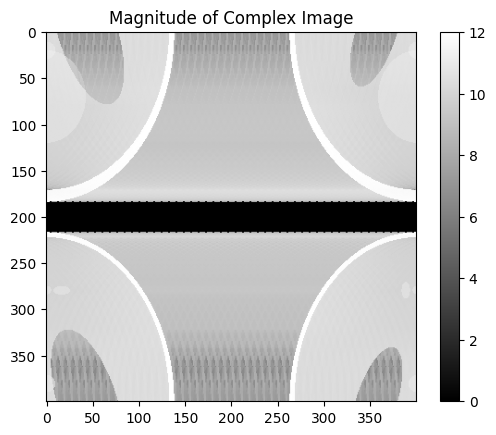

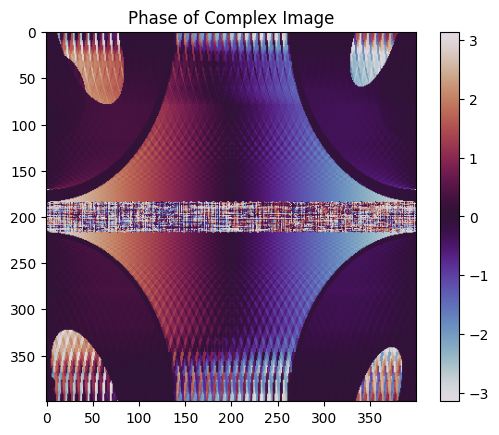

In [79]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

#x = np.array([
#    [1, 2, 3],
#    [4, 5, 6],
#    [7, 8, 9]
#])


def return_zeros(array):
	return np.zeros_like(array)
    
#print(return_zeros(x))

M = np.zeros((16, 16))
M[:, ::4] = 1

def sample_every_4th_row(A):
	A[::4, :] = 0.25
	return A


def simple_column_mask(x, step, seed=None):
    """
    Create a mask that samples every 'step'-th column.

    Parameters:
    - x: (n,m) matrix
    - step: how often to keep a column (e.g., 4 keeps every 4th)

    Returns:
    - masked_matrix: matrix with 0s in all masked columns and 
    """
    
    if seed is not None:
        np.random.seed(seed)
    
    rows, cols = x.shape
    masked_matrix = np.copy(x)
    
    for j in range(1, cols, step):
        masked_matrix[:, j] = 0
    	
    return masked_matrix
    

shepp_logan = ski.data.shepp_logan_phantom()
kspace_shepp = np.fft.fft2(shepp_logan)
kspace_shepp_shifted = np.fft.fftshift(kspace_shepp) # shift to center the zero frequency for better visualization

reconstructed = np.real(np.fft.ifft2(kspace_shepp))
reconstructed_mag = np.real(np.fft.ifft2(np.abs(kspace_shepp) * np.exp(1j * 0)))
reconstructed_phase = np.real(np.fft.ifft2(np.exp(1j * np.angle(kspace_shepp))))

#masked_shepp_logan = simple_column_mask(shepp_logan, 2)
masked_kspace_shepp = np.fft.fft2(simple_column_mask(kspace_shepp, 50))
masked_kspace_shepp_shifted = np.fft.fftshift(masked_kspace_shepp) # shift to center the zero frequency for better visualization

#x3 = np.ones((8,8), dtype=int)
#x4 = np.random.rand(8,8)
#print(x4)
print('------------------------')
#print(x3)
print(shepp_logan)
print('------------------------')
#matrix = create_random_matrix((16,16))

#print(kspace_shepp)
#print(matrix.shape)
#print(matrix[:, 0])
#print(simple_column_mask(x3, 3))
print('----------------------')
#print(x4 @ create_column_mask(x4, 2))

plt.figure()
#plt.imshow(masked_shepp_logan, cmap='gray')

plt.figure()
plt.imshow(np.log(1 + np.abs(masked_kspace_shepp_shifted)), cmap='gray') # np.log to compress the dynamic range
plt.colorbar()
plt.title("Magnitude of Complex Image")

plt.figure()
plt.imshow(np.angle(masked_kspace_shepp_shifted), cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.title("Phase of Complex Image")


#plt.figure()
#plt.imshow(reconstructed_phase)

plt.show()